In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
yoy_data = pd.read_csv('Resources/U20406.csv')
yoy_data.columns
# Remove white space from the left of the category names
yoy_data['Consumption Category '] = yoy_data['Consumption Category '].str.lstrip()
# # Display table
yoy_data.head()

,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Personal consumption expenditures,"11,767,040","11,798,728","11,829,060","11,861,873","11,899,272","11,915,706","11,963,717","11,996,510","12,013,327",...,"13,360,598","13,416,701","13,402,409","12,536,109","10,999,339","11,936,742","12,644,667","12,803,334","12,894,716","13,053,929"
1,Goods,"4,014,969","4,022,791","4,058,192","4,062,611","4,079,113","4,082,367","4,110,216","4,123,925","4,127,108",...,"4,809,568","4,836,425","4,817,167","4,785,163","4,187,078","4,788,176","5,056,974","5,111,153","5,094,280","5,204,134"
2,Durable goods,"1,357,142","1,358,195","1,387,102","1,392,611","1,397,667","1,398,961","1,409,935","1,421,938","1,414,141",...,"1,820,411","1,835,200","1,813,924","1,606,760","1,427,096","1,831,326","1,975,356","2,006,564","2,008,361","2,066,003"
3,Motor vehicles and parts,"454,923","459,403","476,364","479,466","477,788","475,530","478,319","481,932","475,228",...,"542,527","540,229","525,343","422,041","387,073","544,486","560,369","569,535","574,807","600,551"
4,New motor vehicles (55),"261,846","263,596","277,986","274,782","273,556","272,615","273,267","277,852","270,609",...,"287,041","286,841","273,844","213,363","201,248","273,077","277,213","287,123","296,232","322,152"


In [3]:
list(yoy_data['Consumption Category '])

['Personal consumption expenditures',
 'Goods',
 'Durable goods',
 'Motor vehicles and parts',
 'New motor vehicles (55)',
 'New autos',
 'New domestic autos',
 'New foreign autos',
 'New light trucks',
 'Net purchases of used motor vehicles (56)',
 'Used autos',
 'Net transactions in used autos',
 'Used auto margin',
 'Employee reimbursement',
 'Used light trucks',
 'Net transactions in used trucks',
 'Used truck margin',
 'Motor vehicle parts and accessories (58)',
 'Tires',
 'Accessories and parts',
 'Furnishings and durable household equipment',
 'Furniture and furnishings (parts of 31 and 32)',
 'Furniture',
 'Clocks, lamps, lighting fixtures, and other household decorative items',
 'Carpets and other floor coverings',
 'Window coverings',
 'Household appliances (part of 33)',
 'Major household appliances',
 'Small electric household appliances',
 'Glassware, tableware, and household utensils (34)',
 'Dishes and flatware',
 'Nonelectric cookware and tableware',
 'Tools and equipme

In [4]:
yoy_data = yoy_data.loc[(yoy_data['Consumption Category ']=='Durable goods')|
                        (yoy_data['Consumption Category ']=='Nondurable goods')|
                        (yoy_data['Consumption Category ']=='Services'),:]

yoy_data.head()

,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
2,Durable goods,"1,357,142","1,358,195","1,387,102","1,392,611","1,397,667","1,398,961","1,409,935","1,421,938","1,414,141",...,"1,820,411","1,835,200","1,813,924","1,606,760","1,427,096","1,831,326","1,975,356","2,006,564","2,008,361","2,066,003"
69,Nondurable goods,"2,660,549","2,667,298","2,674,394","2,673,472","2,684,923","2,686,891","2,703,838","2,705,901","2,716,496",...,"3,008,558","3,021,381","3,021,272","3,169,119","2,755,262","2,978,595","3,109,915","3,134,189","3,116,286","3,170,807"
147,Services,"7,755,874","7,779,487","7,776,782","7,804,551","7,825,825","7,838,804","7,860,096","7,879,443","7,892,800",...,"8,593,081","8,623,523","8,625,323","7,847,102","6,893,849","7,291,280","7,735,606","7,839,645","7,937,341","7,998,378"


In [5]:
yoy_data = yoy_data.loc[:, ['Consumption Category ', 
        '2015M01', '2015M02', '2015M03', '2015M04','2015M05', '2015M06', '2015M07', '2015M08', '2015M09', 
        '2016M01', '2016M02', '2016M03', '2016M04','2016M05', '2016M06', '2016M07', '2016M08', '2016M09', 
        '2017M01', '2017M02', '2017M03', '2017M04','2017M05', '2017M06', '2017M07', '2017M08', '2017M09', 
        '2018M01', '2018M02', '2018M03', '2018M04','2018M05', '2018M06', '2018M07', '2018M08', '2018M09',
        '2019M01', '2019M02', '2019M03', '2019M04','2019M05', '2019M06', '2019M07', '2019M08', '2019M09',
        '2020M01', '2020M02', '2020M03', '2020M04','2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
yoy_data = yoy_data.apply(lambda x: x.str.replace(',', ''))
yoy_data

,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M09,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
2,Durable goods,1357142,1358195,1387102,1392611,1397667,1398961,1409935,1421938,1414141,...,1808297,1835200,1813924,1606760,1427096,1831326,1975356,2006564,2008361,2066003
69,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,2716496,...,3016226,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
147,Services,7755874,7779487,7776782,7804551,7825825,7838804,7860096,7879443,7892800,...,8557164,8623523,8625323,7847102,6893849,7291280,7735606,7839645,7937341,7998378


In [6]:
yoy_data.columns

Index(['Consumption Category ', '2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2016M01',
       '2016M02', '2016M03', '2016M04', '2016M05', '2016M06', '2016M07',
       '2016M08', '2016M09', '2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2018M01',
       '2018M02', '2018M03', '2018M04', '2018M05', '2018M06', '2018M07',
       '2018M08', '2018M09', '2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2020M01',
       '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07',
       '2020M08', '2020M09'],
      dtype='object')

In [7]:
df15 = yoy_data.loc[:,['Consumption Category ', '2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09']]
df15 = df15.set_index('Consumption Category ')
df16= yoy_data.loc[:,['Consumption Category ', '2016M01',
       '2016M02', '2016M03', '2016M04', '2016M05', '2016M06', '2016M07',
       '2016M08', '2016M09']]
df16 = df16.set_index('Consumption Category ')
df17= yoy_data.loc[:,['Consumption Category ','2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09']]
df17 = df17.set_index('Consumption Category ')
df18=yoy_data.loc[:,['Consumption Category ','2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09']]
df18 = df18.set_index('Consumption Category ')
df19=yoy_data.loc[:,['Consumption Category ','2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
df19 = df19.set_index('Consumption Category ')
df20=yoy_data.loc[:,['Consumption Category ','2020M01',
       '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07',
       '2020M08', '2020M09']]
df20 = df20.set_index('Consumption Category ')
df20

,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,
Durable goods,1835200,1813924,1606760,1427096,1831326,1975356,2006564,2008361,2066003
Nondurable goods,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
Services,8623523,8625323,7847102,6893849,7291280,7735606,7839645,7937341,7998378


In [8]:
consumption_cat = df15.index

In [9]:
df15['2015 Total']=df15.sum(axis=1)
df16['2016 Total']=df16.sum(axis=1)
df17['2017 Total']=df17.sum(axis=1)
df18['2018 Total']=df18.sum(axis=1)
df19['2019 Total']=df19.sum(axis=1)
df20['2020 Total']=df20.sum(axis=1)
df20

yoy_df = pd.DataFrame({
    '2015':df15['2015 Total'],
    '2016':df16['2016 Total'],
    '2017':df17['2017 Total'],
    '2018':df18['2018 Total'],
    '2019':df19['2019 Total'],
    '2020':df20['2020 Total']
})
yoy_df
# yoy_df = yoy_df.set_index('Consumption Category')
# yoy_df

,2015,2016,2017,2018,2019,2020
Consumption Category,,,,,,
Durable goods,1.357142e+62,1.428238e+62,1.532880e+62,1.653125e+62,1.707311e+62,1.835200e+62
Nondurable goods,2.660549e+62,2.732491e+62,2.789700e+62,2.882206e+62,2.963726e+62,3.021381e+62
Services,7.755875e+62,7.954697e+62,8.146649e+62,8.286691e+62,8.438734e+62,8.623524e+62


In [10]:
# set x values
years = yoy_df.columns
years


Index(['2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

In [11]:
dur_goods = yoy_df.loc[yoy_df.index[0],:]
nondur_goods = yoy_df.loc[yoy_df.index[1],:]
services = yoy_df.loc[yoy_df.index[2],:]

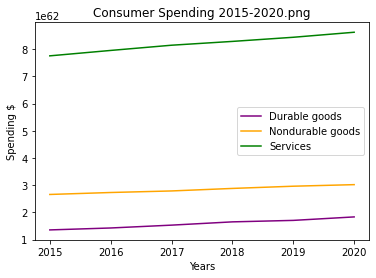

In [12]:
Durable, = plt.plot(years,dur_goods,color='purple',label='Durable goods')
Nondurable, =plt.plot(years,nondur_goods, color='orange',label='Nondurable goods')
Services,=plt.plot(years,services,color='green',label='Services')


plt.legend(handles=[Durable, Nondurable, Services],loc ='best')
plt.title('Consumer Spending 2015-2020.png')
plt.xlabel('Years')
plt.ylabel('Spending $')
plt.savefig('Images/Consumer Spending 2015-2020.png')
plt.show()

In [13]:
yoy_pct_chg_df = yoy_df.pct_change(axis='columns')

yoy_pct_chg_df = pd.DataFrame({
    '2015-2016':yoy_pct_chg_df['2016'],
    '2016-2017':yoy_pct_chg_df['2017'],
    '2017-2018':yoy_pct_chg_df['2018'],
    '2018-2019':yoy_pct_chg_df['2019'],
    '2019-2020':yoy_pct_chg_df['2020']
})
yoy_pct_chg_df

,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
Consumption Category,,,,,
Durable goods,0.052387,0.073266,0.078444,0.032778,0.074907
Nondurable goods,0.027040,0.020937,0.033160,0.028284,0.019454
Services,0.025635,0.024131,0.017190,0.018348,0.021898


In [14]:
yoy_pct_chg=yoy_pct_chg_df.style.format({'2015-2016': "{:.2%}",'2016-2017': "{:.2%}",
                          '2017-2018': "{:.2%}",'2018-2019': "{:.2%}",'2019-2020': "{:.2%}"})
yoy_pct_chg

,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
Consumption Category,,,,,
Durable goods,5.24%,7.33%,7.84%,3.28%,7.49%
Nondurable goods,2.70%,2.09%,3.32%,2.83%,1.95%
Services,2.56%,2.41%,1.72%,1.83%,2.19%


In [15]:
pct_chg_stats = yoy_pct_chg_df.transpose()
pct_chg_stats

Consumption Category,Durable goods,Nondurable goods,Services
2015-2016,0.052387,0.027040,0.025635
2016-2017,0.073266,0.020937,0.024131
2017-2018,0.078444,0.033160,0.017190
2018-2019,0.032778,0.028284,0.018348
2019-2020,0.074907,0.019454,0.021898


In [16]:
# find stats on pct chg across 5 years for each category
pct_chg_stats = pct_chg_stats.describe()
pct_chg_stats

Consumption Category,Durable goods,Nondurable goods,Services
count,5.000000,5.000000,5.000000
mean,0.062356,0.025775,0.021440
std,0.019427,0.005608,0.003629
min,0.032778,0.019454,0.017190
25%,0.052387,0.020937,0.018348
50%,0.073266,0.027040,0.021898
75%,0.074907,0.028284,0.024131
max,0.078444,0.033160,0.025635


In [17]:
# create ave pct chg df
ave_pct_chg = pct_chg_stats.loc[pct_chg_stats.index[1],:].to_frame()
ave_pct_chg.style.format({'mean':('{:.2%}')})

,mean
Consumption Category,
Durable goods,6.24%
Nondurable goods,2.58%
Services,2.14%


    We can use the above to conclude that over the past 5 years:
        Durable goods grew at an average rate of 6.24%
        Nondurable gooods great at an average rate of 2.58%
        Services grew at an average rate of 2.14%

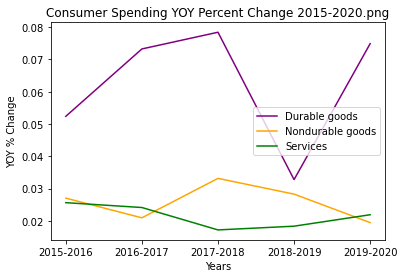

In [18]:
years = yoy_pct_chg_df.columns

dur_goods = yoy_pct_chg_df.loc[yoy_pct_chg_df.index[0],:]
nondur_goods = yoy_pct_chg_df.loc[yoy_pct_chg_df.index[1],:]
services = yoy_pct_chg_df.loc[yoy_pct_chg_df.index[2],:]

Durable, = plt.plot(years,dur_goods,color='purple',label='Durable goods')
Nondurable, =plt.plot(years,nondur_goods, color='orange',label='Nondurable goods')
Services,=plt.plot(years,services,color='green',label='Services')


plt.legend(handles=[Durable, Nondurable, Services],loc ='best')
plt.title('Consumer Spending YOY Percent Change 2015-2020.png')
plt.xlabel('Years')
plt.ylabel('YOY % Change')
plt.savefig('Images/Consumer Spending YOY Percent Change 2015-2020.png')
plt.show()